# **GROUP 3 PROJECT REPORT**

# Introduction


Wine is a popular alcoholic beverage that is enjoyed around the world and can have its origins traced back thousands of years. Throughout history, people have developed many methods and technologies for creating this luxury product since a wine's quality is influenced by a variety of factors such as the type of grape, region where it is produced, weather, and wine-making techniques. Winemakers strive to produce high-quality wine that appeals to consumers' taste buds; however, the assessment of wine quality can be subjective and varies from person to person depending on their taste. Of the 5 senses we have available to us, taste is often thought of as the least understood sense because of how difficult it is to quantify. This can pose problems for industries where business is influenced by the taste of a product, which is especially true for the wine industry. Expert wine testers are often needed to determine and certify the quality of different wines through sensory tests. (Cortez, 2009) While this is the current industry standard, are there any other ways to certify the quality of a wine without depending on these experts? This leads to our question:

**Is it possible to predict the quality classification of a wine based on quantifiable physicochemical properties using data analysis?**


We used the Wine Quality dataset, which is publicly available on the UCI Machine Learning Repository. This dataset contains details of two separate datasets, red and white *winho verde* wine samples from the north of Portugal. The red wine dataset contains 1,599 samples and the white dataset contains 4,898 samples. There are 11 quantified physicochemical properties (e.g., fixed acidity, volatile acidity, citric acid, residual sugar, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol) and there is one categorical variable for the wine quality classified on an integer scale of 1-10. In this project, we concatenated the two datasets to create a single dataset containing 6,497 samples and including a new categorical variable for the wine type. We randomly split this dataset into a training set (75% of the data) and a test set (25% of the data).

<u> Dataset citation: </u> \
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. *Decision Support Systems*, 47(4), 547–553. doi:10.1016/j.dss.2009.05.016

# Methods & Results:

**TODO LIST**

- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

your report should include code which:
- loads data from the original source on the web 
- wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all tables and figure should have a figure/table number and a legend


==========================================================================================================================

**1. LOADING DATA**

* First we set up all of the packages we will be using for the analysis. Note that a more recent version of altair must be loaded in to prevent a bug specific to jupyter notebooks and the use of hconcat or vconcat.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample

! pip install altair==5.0.0rc1 
import altair as alt

<br>

* The wine data for red and white wine is then loaded from the web using the pandas library's read_csv() function. The URL of each dataset was provided and contains data on wine quality, wine type, and various chemical properties of the wine. Specifically, the Red Wine data was set to data_red and White Wine data was set to data_white. Furthermore, we concatenated red and white wine data and set it to data_wine.


In [2]:
data_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";").assign(type = "red")
data_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";").assign(type = "white")
data_wine = pd.concat([data_red, data_white])
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


*Table: 1*

<br>

**2. SUMMARY OF DATA**

* We then preform a summary of the data so that we may know what we are working with in our exploratory analysis. First, we explore the statistical data of each column in the dataset which includes the count, mean, standard deviation, minimum, and maximum values of each chemical property. We then look for how many null values are in each column, and finally we count the number of unique occurances in each column. This summary of data was preformed on the concatenated dataset of red and white wine, so it explores all data availible.

In [3]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


*Table: 2*

In [4]:
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

*Array: 1*

In [5]:
data_wine.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64

*Array: 2*

<br>

* *Array 1* shows us that there are no observations containing null values, which will help us later in our analysis. Also, *Array 2* shows that there are 7 unique occurrences in the quality column and *Table 2* shows us that the min and max values of the quality column are 3 and 9 respectively. This indicates that all wines in the dataset will have a quality in the range of 3 to 9, meaning that a knn model will have a hard time predicting values outside of that range. We can also see from *Table 2* that the mean of the quality column is 5.8 with a standard deviation of 0.87.

* We further explore the quality column with a bar plot of occurrences. We must limit ourselves to a sample of the data, since altair cannot handle over 5000 observations:

In [6]:
sample_size = 5000
data_sample = data_wine.sample(sample_size, random_state=123)

quality_plot = (alt.Chart(data_sample, title=alt.TitleParams("Distribution of Quality", fontSize=20))
                .mark_bar(size=25)
                .encode(
                    x=alt.X("quality:Q", title="Quality", scale=alt.Scale(domain=[2,9], zero=False)),
                    y=alt.Y("count()", title="Count of Occurances", scale=alt.Scale(zero=False)))
               .properties(
               width=400,
               height=400))
quality_plot

alt.Chart(...)

*Graph: 1*

* *Graph 1* gives us a good idea of how the quality ratings in our dataset are distributed. We can see that our dataset is not very well balanced and may need to be resampled later


* We will now perform a visual summary to compare the relevancy of each chemical property to the quality of the wine. We will also include a visualization of wine type vs quality to see if there is a significant difference between the two types. Note that will be taking a sample to make our graphs more readable.

In [7]:
scatter_plots = []
sample_opacity = 0.7
sample_size = 450

data_sample = data_wine.sample(sample_size, random_state=123)
red_count   = data_sample[data_sample["type"] == "red"].shape[0]      #for subtitle
white_count = data_sample[data_sample["type"] == "white"].shape[0]    #for subtitle

for property_name in data_sample.columns[:-2]:
    scatter_plot = (alt.Chart(data_sample)
                    .mark_circle(opacity=sample_opacity)
                    .encode(
                        x=alt.X(f"quality:Q", scale=alt.Scale(domain=(1, 10))),
                        y=alt.Y(f"{property_name}:Q", scale=alt.Scale(zero=False)),
                        color="type:N")
                    .properties(
                        width=250,
                        height=250,
                        title=f"{property_name.title()} vs Quality, by Wine Type"))
    scatter_plots.append(scatter_plot)
    
scatter_plots.append(alt.Chart(data_sample)
                     .mark_circle(opacity=sample_opacity)
                     .encode(
                         x=alt.X(f"quality:Q", scale=alt.Scale(domain=[1,10])),
                         y=alt.Y("type"),
                         color="type:N")
                     .properties(
                         width=250,
                         height=250,
                         title=f"Type vs Quality, by Wine Type"))
 
    
wine_plot = alt.VConcatChart(vconcat=(alt.hconcat(*scatter_plots[0:4]), 
                                      alt.hconcat(*scatter_plots[4:8]), 
                                      alt.hconcat(*scatter_plots[8:])), 
                             title=alt.TitleParams(
                                 "Plot of All Wine Properties vs Quality", 
                                 fontSize=30,
                                 subtitle="(sample size "+str(sample_size)+": "+str(red_count)+" red / "+str(white_count)+" white)", anchor="middle", dy=-10))

wine_plot

alt.VConcatChart(...)

*Graph: 2*

* *Graph 2* shows us that there are not many chemical properties with strong positive or negative relationships with quality. The strongest relationship of them all seems to be a slight positive relationship between alcohol and quality. We can also see that quality does indeed range between 3 and 9 for both red and white wines.

* In light of this, we will use all chemical properties in our analysis in the hopes that there is a correlation that cannot be seen with this 2D representation. We will also test our models in 2 different ways: once with the concatenated dataset, and once with the red wine and white wine datasets separated. In this way, we can compare the accuracies and we will know what method of training is best.

* Finally, we will preform a visual analysis of the ratio between red and white wine occurances in our dataset. Again we limit ourselves to a sample size of 5000 so that altair can work with our data

In [8]:
sample_size = 5000
data_sample = data_wine.sample(sample_size, random_state=2020)

red_count   = data_sample[data_sample["type"] == "red"].shape[0]      #for subtitle
white_count = data_sample[data_sample["type"] == "white"].shape[0]    #for subtitle

type_plot = (alt.Chart(data_sample, title=alt.TitleParams("Wine Type Distribution", 
                                                         fontSize=20,
                                                         subtitle=str(red_count)+" red / "+str(white_count)+" white"))
                .mark_bar(size=70)
                .encode(
                    x=alt.X("type", title="Wine Type"),
                    y=alt.Y("count()", title="Count of Occurances"),
                    color="type:N")
               .properties(
               width=250,
               height=250))

type_plot

alt.Chart(...)

*Graph: 3*

<br>

**3. PREPROCESSING DATA**

* As we begin preprocessing our data we split the data into its test/train portions. We do this separately for the concatenated data, the red wine data, and the white wine data.  We also haven't fully preprocessed this data yet, so the portions that still need to be processed are labelled as "raw"

In [9]:
# splits for concatenated wine data
train_raw, test_raw = train_test_split(data_wine, test_size=0.25, random_state=123)

# splits for red wine data
train_red_raw, test_red = train_test_split(data_red, test_size=0.25, random_state=123)

#splits for white wine data
train_white_raw, test_white = train_test_split(data_white, test_size=0.25, random_state=123)

* Before we begin the rest of the preprocessing we must first deal with our problem of an unbalanced dataset by resampling it. We know from *Graph 1* that our dataset is heavily biased toward a quality classification of 5 or 6, hence the need to resample it. While this may not be statistically sound, this is the method we learned in class for dealing with unbalanced data. By using resampling, we can give more weight to the more rare classifications of wine quality.
* We know that our full dataset contains quality classifications from 3 to 9 from our previous summary of data. To fully understand this range, we count the number of each classification in our 3 datasets: Concatenated Wine, Red Wine, and White Wine. 
* Note that this resampling will be preformed only on training data.

***SO UPDATE, THE RESAMPLING MAKES EVERYTHING WORSE SO I'M SHELVING IT FOR NOW UNTIL I GET A RESPONSE BACK ON PIAZZA. IT MIGHT STILL BE USEFULL SO PLEASE DON'T DELETE IT YET.***

In [10]:
# qualities = pd.DataFrame({"quality": [i for i in range (1,11)]})

# all_count = [0 for i in range(10)]
# r_count = [0 for i in range(10)]
# w_count = [0 for i in range(10)]

# for i in range(0,10):
#     try:
#         all_count[i] = train_raw["quality"].value_counts()[i+1]
#     except:
#         None
#     try:
#         r_count[i] = train_red_raw["quality"].value_counts()[i+1]
#     except:
#         None
#     try:
#         w_count[i] = train_white_raw["quality"].value_counts()[i+1]
#     except:
#         None
    
# qualities["Concatenated Wine"] = all_count
# qualities["Red Wine"] = r_count
# qualities["White Wine"] = w_count
# qualities

*Table: 3*

* We see from *Table 3* that for each dataframe, the maximum count for a quality classification is **2125**, **508**, and **1624** respectively. We will use these max counts to resample the 3 datasets by filtering for each quality, resampling them one by one, then concating each dataset back together.

In [11]:
# all_max = max(all_count)
# r_max = max(r_count)
# w_max = max(w_count)

# def resample_df(df, max_c, count):
#     resampled = []
#     for i in range(1,11):
#         if count[i-1] != 0 and count[i-1] != max_c:
#             matching = df[df["quality"] == i]
#             matching_upsample = resample(matching, n_samples=max_c, random_state=123)
#             resampled.append(matching_upsample)
#         elif count[i-1] == max_c:
#             matching = df[df["quality"] == i]
#             resampled.append(matching)
            
#     resampled_df = pd.concat([*resampled])
#     return resampled_df

# train_raw = resample_df(train_raw, all_max, all_count) 
# train_red_raw = resample_df(train_red_raw, r_max, r_count) 
# train_white_raw = resample_df(train_white_raw, w_max, w_count) 

* Now that our data has been resampled, lets see what our counts look like:

In [12]:
# qualities_new = pd.DataFrame({"quality": [i for i in range (1,11)]})

# all_count_new = [0 for i in range(10)]
# r_count_new = [0 for i in range(10)]
# w_count_new = [0 for i in range(10)]

# for i in range(0,10):
#     try:
#         all_count_new[i] = train_raw["quality"].value_counts()[i+1]
#     except:
#         None
#     try:
#         r_count_new[i] = train_red_raw["quality"].value_counts()[i+1]
#     except:
#         None
#     try:
#         w_count_new[i] = train_white_raw["quality"].value_counts()[i+1]
#     except:
#         None
    
# qualities_new["Concatenated Wine"] = all_count_new
# qualities_new["Red Wine"] = r_count_new
# qualities_new["White Wine"] = w_count_new
# qualities_new

***HERES THE OTHER CODE BLOCK WE USED TO SPLIT TRAIN/TEST AND X/Y DATA FOR KEEPSAKES***

In [13]:
# # splits for concatenated wine data
# X = data_wine.drop('quality', axis=1)
# y = data_wine['quality']
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# # splits for red wine data
# X_red = data_red.drop(['quality', 'type'], axis=1)
# y_red = data_red['quality']
# X_train_red_raw, X_test_red_raw, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.25, random_state=123)

# #splits for white wine data
# X_white = data_white.drop(['quality', 'type'], axis=1)
# y_white = data_white['quality']
# X_train_white_raw, X_test_white_raw, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.25, random_state=123)

*Table: 4*

***OK BACK TO THE REGULAR CODE THAT WORKS***

* All counts are now even and our data is ready to complete preprocessing. Notice that we did not change any of the counts for quality ratings that were orriginally 0. This is because these counts are outside the range of our data and cannot be resampled since there is nothing to resample with.

In [14]:
# Concatenated Wine
X_train_raw = train_raw.drop('quality', axis=1)
y_train = train_raw['quality']

X_test_raw = test_raw.drop('quality', axis=1)
y_test = test_raw['quality']


# Red Wine
X_train_red_raw = train_red_raw.drop(['quality', 'type'], axis=1)
y_train_red = train_red_raw['quality']

X_test_red = test_red.drop(['quality', 'type'], axis=1)
y_test_red = test_red['quality']


# White Wine
X_train_white_raw = train_white_raw.drop(['quality', 'type'], axis=1)
y_train_white = train_white_raw['quality']

X_test_white = test_white.drop(['quality', 'type'], axis=1)
y_test_white = test_white['quality']

* After this we will preprocess and scale the raw X data for each dataset. For the concatenated dataset we will also use OneHotEncoder so that we can incorporate the type of wine as a numerical feature in our models. We also know from *Array 1* that there are no missing values in our data, so we don't have to remove any in our preprocessing step.

In [15]:
features_categorical = [
    "type"
]
features_numerical = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# concatenated wine training data
ct = make_column_transformer(
    (StandardScaler(), features_numerical),
    (OneHotEncoder(drop="first"), features_categorical)
)
X_train = ct.fit_transform(X_train_raw)


# OneHotEncoding wine testing data
ct = make_column_transformer(
    (OneHotEncoder(drop="first"), features_categorical)
)
X_test = X_test_raw.drop("type", axis=1).assign(type=ct.fit_transform(X_test_raw))



# red and white wine data
ct = make_column_transformer(
    (StandardScaler(), features_numerical),
)
X_train_red = ct.fit_transform(X_train_red_raw)

X_train_white = ct.fit_transform(X_train_white_raw)

* The data is now completely prepared for our exploratory analysis.

<br>

**4. DATA ANALYSIS**

* The main question we sought to answer was: 
> "Is it possible to predict the quality classification of a wine based on quantifiable physicochemical properties using data analysis?" 

*  To answer this question, we used a machine learning model to predict wine quality based on the chemical properties of the wine. We chose a KNN model because it is a simple and effective algorithm for classification and regression tasks. KNN is also non-parametric, meaning it makes no assumptions about the distribution of the data. Linear Regression is also a good choice because it is a simple and widely used algorithm for regression tasks. Linear Regression is also interpretable and can provide insight into which features are important in predicting wine quality.

* Below we coded 2 functions. One that tunes a KNN classification model using GridSearchCV with a 5-fold cross-validation by trying all values between 1 and 150 for the ideal number of neighbours. The second plots each number of N Neighbors vs its accuracy.

In [16]:
knn = KNeighborsClassifier(weights="distance")

param_grid = {
    "n_neighbors": range(1, 100),
}

def train_tuned_model(X_train, y_train):
    tune = GridSearchCV(
            knn,
            param_grid,
            cv = 5,
            n_jobs = -1,
            return_train_score=True)
    model = tune.fit(X_train, y_train)
    return model

def plot_tuned_model_knns(model, wine_type):
    accuracies = pd.DataFrame(model.cv_results_)
    plot = (alt.Chart(accuracies, title="Accuracy vs Hyperparameter for Model of "+ wine_type)
                .mark_line(opacity=0.8)
                .encode(
                        x=alt.X(
                            "param_n_neighbors", 
                            title="N Neighbors",
                            scale=alt.Scale(zero=False),
                        ),
                        y=alt.Y(
                            "mean_test_score", 
                            title="Accuracy",
                            scale=alt.Scale(zero=False)
                        ))
                .properties(
                    width=400,
                    height=400))
    return plot

* Now we use the above functions to tune models and find the best N Neighbors for all 3 wine datasets: Concatenated Wine, Red Wine, and White Wine. Expect this step to take a while.

In [17]:
wine_model = train_tuned_model(X_train, y_train)
wine_red_model = train_tuned_model(X_train_red, y_train_red)
wine_white_model = train_tuned_model(X_train_white, y_train_white)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [18]:
plot_wine = plot_tuned_model_knns(wine_model, "Concatenated Wine")
plot_red = plot_tuned_model_knns(wine_red_model, "Red Wine")
plot_white = plot_tuned_model_knns(wine_white_model, "White Wine")

plot = alt.HConcatChart(hconcat=(plot_wine, plot_red, plot_white), 
                             title=alt.TitleParams(
                                 "Hyperparameter Plots for 3 Wine Datasets", 
                                 fontSize=30,
                             anchor="middle",
                             dy=-15))
plot

alt.HConcatChart(...)

*Graph: 4*

* Graph 4 visualizes the changes in best hyperparameter (N Neighbors) for each of the three wine datasets. We find the best parameter below with:

In [19]:
best_wine_param = wine_model.best_params_["n_neighbors"]
best_wine_red_param = wine_red_model.best_params_["n_neighbors"]
best_wine_white_param = wine_white_model.best_params_["n_neighbors"]


print("Concatenated wine best N Neighbors: " + str(best_wine_param))
print("Red wine best N Neighbors: " + str(best_wine_red_param))
print("White wine best N Neighbors: " + str(best_wine_white_param))

Concatenated wine best N Neighbors: 82
Red wine best N Neighbors: 92
White wine best N Neighbors: 35


* We will use these parameters to train a model for each of the three wine datasets and then evaluate their performance. To do this we made three functions. One to train a model with the best N Neighbors for that dataset, one to create a confusion matrix display for that dataset, and one to perform accuracy, precision, recall and f1 scores for that dataset.

In [20]:
def trained_model(X_train, y_train, best_n):
    knn = KNeighborsClassifier(n_neighbors=best_n)
    knn = knn.fit(X_train, y_train)
    return knn

def matrix(y_pred, y_test, model):
    mat = confusion_matrix(
        y_pred,
        y_test,
        labels=model.classes_)
    
    display = ConfusionMatrixDisplay(
        confusion_matrix=mat, display_labels=model.classes_)
    return display.plot()

def scores(y_pred, y_test, wine_type):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(wine_type + " Accuracy:", accuracy)
    print(wine_type + " Precision:", precision)
    print(wine_type + " Recall:", recall)
    print(wine_type + " F1-score:", f1)
    


wine_trained = trained_model(X_train, y_train, best_wine_param)
wine_trained_pred = wine_trained.predict(X_test)

wine_red_trained = trained_model(X_train_red, y_train_red, best_wine_red_param)
wine_red_trained_pred = wine_red_trained.predict(X_test_red)

wine_white_trained = trained_model(X_train_white, y_train_white, best_wine_white_param)
wine_white_trained_pred = wine_white_trained.predict(X_test_white)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


* Below we compute the confusion matrix and scores of each dataset:

## Concatenated Wine

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Concatenated Wine Accuracy: 0.39015384615384613
Concatenated Wine Precision: 0.2890375328320228
Concatenated Wine Recall: 0.39015384615384613
Concatenated Wine F1-score: 0.32986786658095857


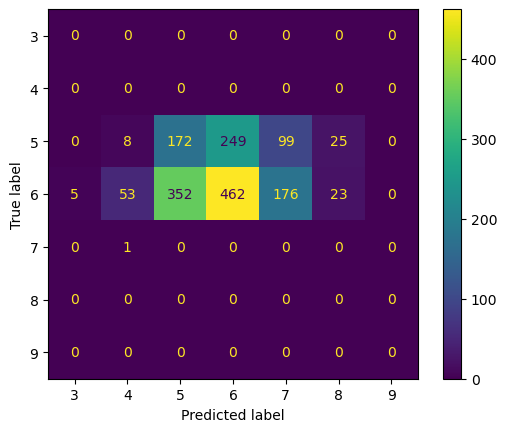

In [21]:
scores(wine_trained_pred, y_test, "Concatenated Wine")
matrix(wine_trained_pred, y_test, wine_trained)

*Graph: 5*

## Red Wine

Red Wine Accuracy: 0.4425
Red Wine Precision: 0.3460062731386261
Red Wine Recall: 0.4425
Red Wine F1-score: 0.30705889619052323


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


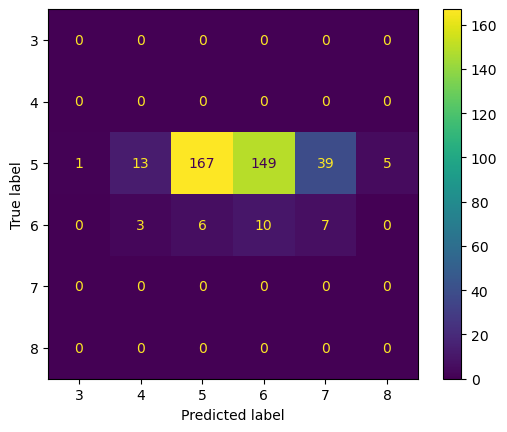

In [22]:
scores(wine_red_trained_pred, y_test_red, "Red Wine")
matrix(wine_red_trained_pred, y_test_red, wine_red_trained)

*Graph: 6*

## White Wine

White Wine Accuracy: 0.41877551020408166
White Wine Precision: 0.3267052237320422
White Wine Recall: 0.41877551020408166
White Wine F1-score: 0.36500628789552025


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


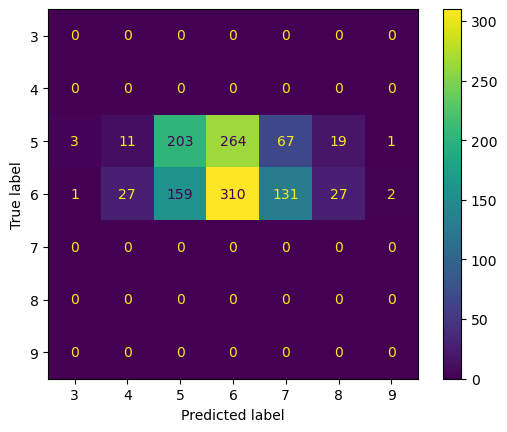

In [23]:
scores(wine_white_trained_pred, y_test_white, "White Wine")
matrix(wine_white_trained_pred, y_test_white, wine_white_trained)

*Graph: 7*

We evaluated the models using accuracy as the metric to evaluate the model. Accuracy is a commonly used metric for classification problems, and it measures the proportion of correctly classified observations out of the total number of observations.  This metric is suitable for balanced datasets where the number of instances in each class is similar. We have included other metrics such as precision, recall, and F1-score in our computation along with the Accuracy score for extra work.


For predictors variables, we will use all the available predictors to train the model. There are 11 numerical predictors, such as fixed acidity, volatile acidity, citric acid, residual sugar, etc., and 1 categorical predictor, type (which is either red or white). StandardScaler is used to standardize the numerical features, and OneHotEncoder is used to encode the categorical variable. Standardization is important for KNN as it calculates the distance between observations, and if the variables are on different scales, the distances might not be meaningful. OneHotEncoder is used to convert the categorical variable into a numerical format that can be used in the model. The "drop='first'" argument is used to avoid the dummy variable trap, where the columns of the encoded variables are linearly dependent. Finally, make_column_transformer is used to apply these transformations to the appropriate subsets of the data.

# Discussion:
summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

In this project, I explored the relationship between wine properties and wine quality using the Wine Quality dataset. The dataset contained 11 columns describing different properties of wine, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. The target variable was wine quality, which was a score between 1 and 10. The dataset contained 6497 observations, and after cleaning the data, I had 5367 observations left.

............. write more about what the wine score was after data analysis (distribution), how the visualizations looked like for what relationships,  what machine models we used and what the predict score was. ..........

...........then write about what we found. which idk column features were dominating the wine quality results.  ..........

The findings of this project could have several impacts. First, they could be used by wine producers to optimize their production processes and create higher-quality wines. By focusing on the wine properties that are most strongly related to quality, producers could make more informed decisions about which grapes to use and how to process them. Additionally, the findings could be used to educate consumers about the factors that contribute to wine quality and help them make more informed purchasing decisions.

The findings of this project could also lead to several future research questions. For example, future studies could explore the impact of other wine properties, such as tannins and acidity, on wine quality. Additionally, future studies could explore the relationship between wine properties and the sensory experience of drinking wine, such as flavor and aroma. Finally, future studies could investigate the impact of different winemaking techniques on wine quality and the relationship between wine properties and aging.

# References:
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.

# Methods


We will be performing a classification using n nearest neighbours to predict the quality of observed *winho verde* wines. We will conduct our data analysis using all properties provided by the data frame. We will do this because by looking at the graphs made during our Preliminary Exploratory Data Analysis, we found that there weren't many strong relationships between wine properties and quality--or at least these relationships haven't made themselves immediately apparent. This is only to the human eye, however, so we hope that once all properties are analyzed together (something which can't be represented by a 2-D graph) that patterns will make themselves more apparent to our classification model. We also wish to include the wine type in the properties we use in our model. How we go about this though is something to be seen during the creation of our project, since there are two ways we can think of doing this: 

1) We turn the categorical data of wine type into numerical data using OneHotEncoder() and incorporate that into our n_nearest_neighbors model. We aren't sure if this will work or if it will confuse our model since both wine types can have very different physiochemical makeups. This is best demonstrated by our residual sugar graph. If this does seem to confuse our model and our model's accuracy is low, then we may test our second method.

2) We keep our data separated into two datasets, one for red and one for white, then train both separately and create a classification model for each type. This might help our model avoid any confusion between the differing physiochemical makeups of the two wine types.

We will visualize our result by creating a scatterplot of {property} vs quality for each property using our testing data (or a sample of our testing data) and then overlaying a line plot of our predicted quality. It will look similar to the graph layout in our Preliminary Exploratory Data Analysis, just including the overlay. We would also like to include a visualization involving our prediction accuracy, but we are unsure how to go about it.

# Expected Outcomes and Significance


We expect that our model(s) will accurately predict qualities between 4 and 7 since that's where most of the training data falls. It may have trouble predicting wines with quality far outside that range. 

The accurate predictions of wine quality based on physicochemical properties could have large implications for how the wine industry conducts its quality certifications. It is doubtful that our model will have a high enough accuracy to instantly revolutionize the wine certification process, but a small success with our method could encourage further research with more complicated methods. If those more complicated methods can prove themselves trustworthy in predicting wine quality, then that could change the industry standard for how wines are certified in the future (assuming people allow this change).

The success of this scenario could lead to future questions about the relationship between the physicochemical properties of various foods and what people think tastes "good".

# Discussion:
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?


# References:
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.